### ***Project Overview***

*Bati Bank is partnering with an upcoming successful eCommerce company to enable a buy-now-pay-later service - to provide customers with the ability to buy products by credit if they qualify for the service. You are assigned a project to create a Credit Scoring Model using the data provided by the eCommerce platform.*

##### ***1. Data Collection***

In [1]:
## Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import data
df = pd.read_csv('../data/data.csv')
df_variables = pd.read_csv('../data/variable_definition.csv')

In [3]:
## View the structure of the data
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
## The shape of the data
df.shape

(95662, 14)

In [6]:
## General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   ProviderId            95662 non-null  object 
 6   ProductId             95662 non-null  object 
 7   ProductCategory       95662 non-null  object 
 8   ChannelId             95662 non-null  object 
 9   Amount                95662 non-null  float64
 10  Value                 95662 non-null  int64  
 11  TransactionStartTime  95662 non-null  object 
 12  PricingStrategy       95662 non-null  int64  
 13  FraudResult           95662 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 10.2+ MB


In [54]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

***Observation***

*As It can be seen from the General inforamtion there are no missing values and the 'TransactionStartTime' datatype is represented incorrectly.*

#### ***2. Exploratory Data Analysis***

In [ ]:
## Since the currency code and country code are same across all rows we have to remove them.
df.drop(columns=['CurrencyCode', 'CountryCode'], inplace=True)

In [7]:
## General Statistics
df.describe()

,Amount,Value,PricingStrategy,FraudResult
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018
std,1.233068e+05,1.231221e+05,0.732924,0.044872
min,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000


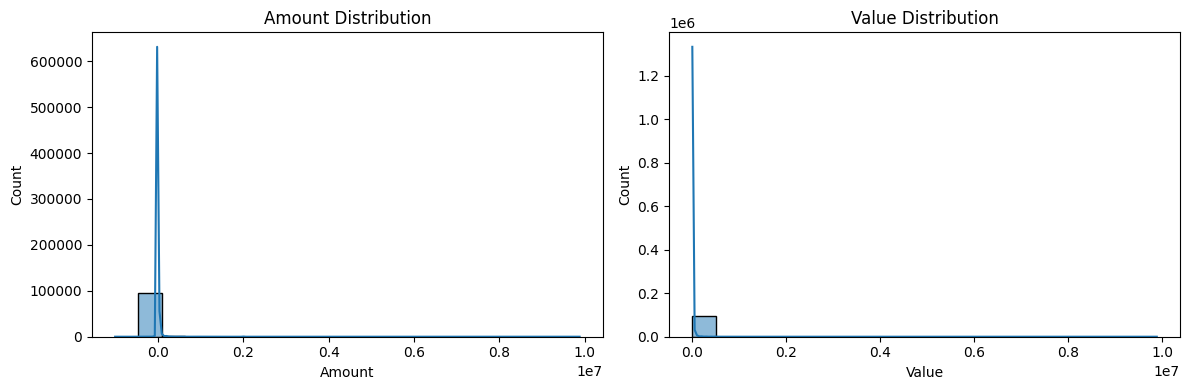

In [21]:

fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=df, x=df['Value'], bins=20, kde=True, ax=axs[1])
sns.histplot(data=df,x=df['Amount'], bins=20, kde=True, ax=axs[0])
axs[0].set_title("Amount Distribution")
axs[1].set_title("Value Distribution")

plt.tight_layout()
plt.show()

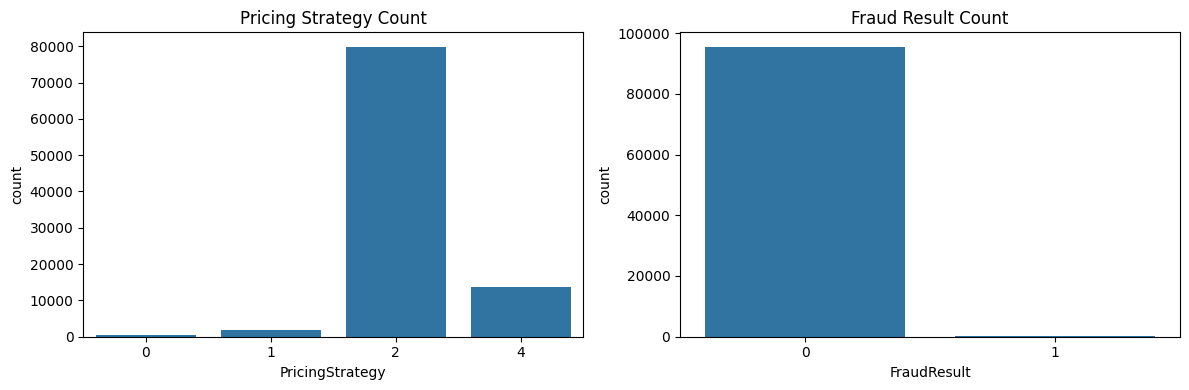

In [22]:
fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.countplot(data=df, x=df['PricingStrategy'], ax=axs[0])
sns.countplot(data=df, x=df['FraudResult'], ax=axs[1])
axs[0].set_title("Pricing Strategy Count")
axs[1].set_title("Fraud Result Count")
plt.tight_layout()
plt.show()

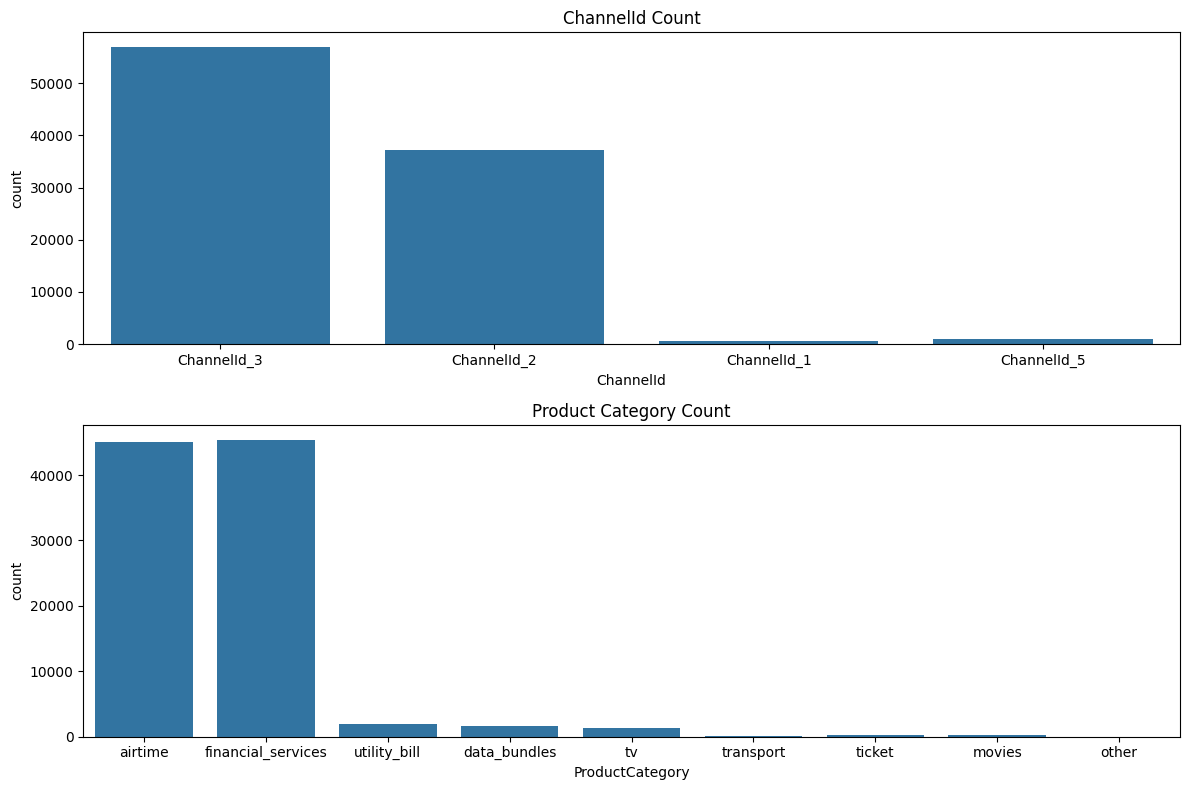

In [32]:
fig,axs= plt.subplots(2,1,figsize=(12,8))
sns.countplot(data=df, x=df['ChannelId'], ax=axs[0])
sns.countplot(data=df, x=df['ProductCategory'], ax=axs[1])
axs[0].set_title("ChannelId Count")
axs[1].set_title("Product Category Count")
plt.tight_layout()
plt.show()

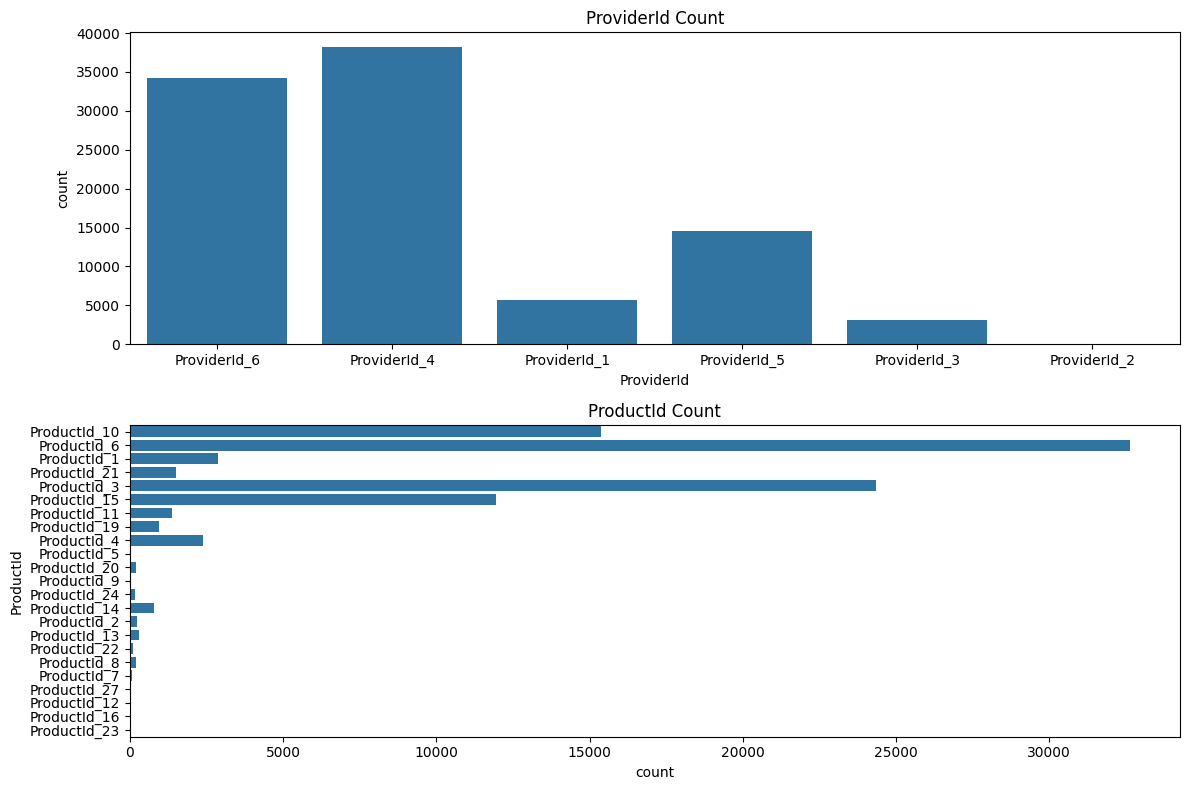

In [42]:
fig,axs= plt.subplots(2,1,figsize=(12,8))
sns.countplot(data=df, x=df['ProviderId'], ax=axs[0])
sns.countplot(data=df, y=df['ProductId'], ax=axs[1])
axs[0].set_title("ProviderId Count")
axs[1].set_title("ProductId Count")
plt.tight_layout()
plt.show()

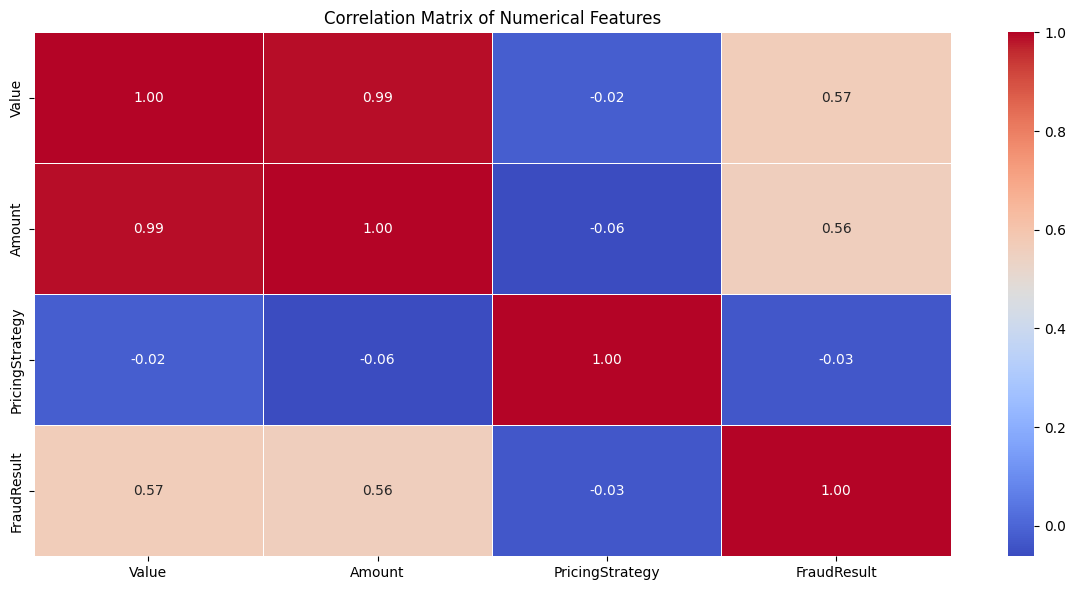

In [52]:
## Correlation between numerical features

columns = ['Value','Amount','PricingStrategy','FraudResult']
corr = df[columns].corr()

 # Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')

plt.tight_layout()
plt.show()

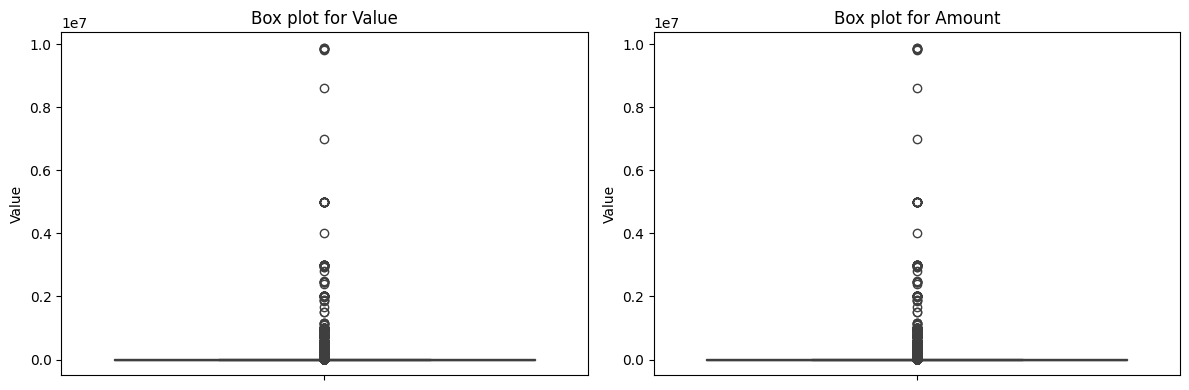

In [53]:
## Boxplot to detect outliers
fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df, y='Value',ax=axs[0])
sns.boxplot(data=df, y='Value',ax=axs[1])
axs[0].set_title("Box plot for Value")
axs[1].set_title("Box plot for Amount")

plt.tight_layout()
plt.show()